# Linear Regression and Gradient Descent

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from pylab import *
from sklearn.datasets import load_svmlight_file

In [81]:
#read data
x,y = load_svmlight_file("housing_scale")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

(n,m) = x_train.shape
print("The demensin of x_train dataset is:",(n,m))

The demensin of x_train dataset is: (339, 13)


In [67]:
#initialize data
x_train = x_train.todense()
x_test = x_test.todense()
x_train = np.hstack((np.ones((n,1)),x_train))
x_test = np.hstack((np.ones((len(x_test),1)),x_test)) #add constant term row
y_train = y_train.reshape((n,1))
y_test = y_test.reshape((len(y_test),1))

W = np.zeros((m+1,1)) #weights
loss_train = []
loss_test = []
MAX_LOOPS = 10000
cnt = 0
learning_rate = 0.00005

In [68]:
#gradient descent
while True:
    y_train_pred = x_train*W;  
    deltaW = learning_rate*(x_train.T*(y_train-y_train_pred))
    W = W+deltaW
    loss_train.append(1/2*(np.linalg.norm(y_train - x_train*W) )**2)
    y_test_pred = x_test*W
    loss_test.append(1/2*(np.linalg.norm(y_test - y_test_pred) )**2)
    if loss_train[-1]< 0.01 or cnt>MAX_LOOPS:
        break
    cnt = cnt+1

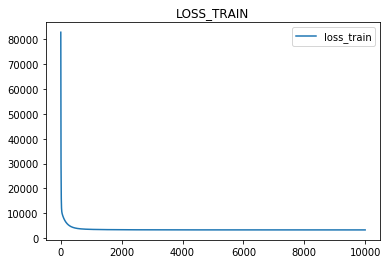

In [95]:
#loss plot
#p1 = plot(np.true_divide(loss_train,n),label='loss_train') #per sample
p1 = plot(loss_train[:],label='loss_train') #total
title("LOSS_TRAIN")
legend()
plt.show()

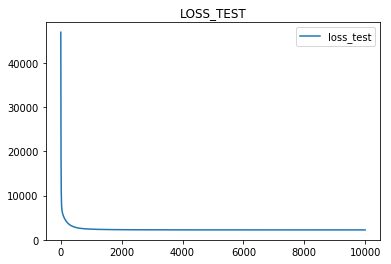

In [96]:
#p2 = plot(np.true_divide(loss_test,len(loss_test)),label='loss_test')
p1 = plot(loss_test[:],label='loss_test')
title("LOSS_TEST")
legend()
plt.show()

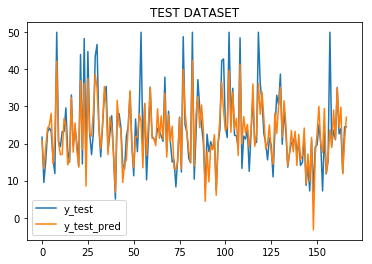

In [77]:
#test result plot
plot(y_test,label='y_test')
plot(y_test_pred,label='y_test_pred')
title("TEST DATASET")
legend()
plt.show()

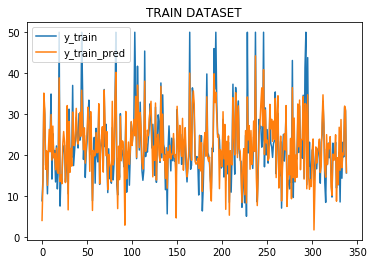

In [78]:
#train result plot
plot(y_train,label='y_train')
plot(y_train_pred,label='y_train_pred')
title("TRAIN DATASET")
legend()
plt.show()